
# Øving 1, TMA4320

* **Veiledning:** Torsdag 9. januar, 0815-1000 i H3
* **Innleveringsfrist:** Torsdag 16. januar, kl 1400
* **Innleveringsmetode** Følgende to krav er nødvendig for godkjenning
    1. Opplasting av Jupyter Notebook (individuelt) i Blackboard
    2. Svare på skjema med kontrollspørsmål under Øving 1 i Blackboard


Vi skal gjøre en liten oppvarming med bruk av Jupyter Notebooks, men med lite teori siden vi ennå ikke har kommet ordentlig i gang. 

**Oppgave 0.**
Hvis du har installert Anaconda på din PC og har testet ut Jupyter Notebook, så trenger du ikke gjøre de første to punktene av denne oppgaven. I motsatt fall regner jeg med at du leser denne teksten som en webside (.html), og må da gjøre følgende for å kunne laste opp Øving 1.ipynb i Jupyter Notebook.
* Last ned og installer Anaconda på din PC, f.eks. fra [https://www.anaconda.com/download](https://www.anaconda.com/download "Lenke").
* Start Anaconda-applikasjonen, og klikk på "launch" i Jupyter Notebook boksen.
* Lagre filen "Øving 1.ipynb" fra Blackboard, og last den opp i Jupyter Notebook
* Gjør de andre oppgavene nedenfor ved å redigere denne filen, og lagre sluttresultatet
* Din ferdiglagede Notebook lastes så opp som svar på Øving 1
* I tillegg skal du forøvrig svare på tre kontrollspørsmål på et eget skjema i Blackboard. Spørsmålene finner du lenger ned i øvingen.

Jupyter Notebook har ulike typer *celler* eller avsnitt. Det du ser på nå er en såkalt Markdown-celle som brukes til å skrive tekst og formler. Markdownspråket er veldig enkelt å bruke og en kjapp innføring finner du
[her](https://daringfireball.net/projects/markdown/syntax#list "Markdown guide"). 

En annen celletype er "Code". Vi inkluderer en slik rett nedenfor der vi importerer et bibliotek som heter *numpy* (med alias np).

In [1]:
import numpy as np

Merk at man utfører kode ved å taste Shift+Enter inne i en celle.

Å sette inn nye celler under eller over en annen celle gjøres enkelt ved velge "Insert" i menyen. Default celletype blir "Code", men du kan endre denne i rullgardinmenyen hvor det står "Code".

**Oppgave 1.** Et Python-bibliotek du skal bruke mye i dette kurset er *numpy*-biblioteket og vi har allerede vist hvordan du importerer dette. I dette biblioteket fins det meste av det du måtte trenge av numeriske metoder.
Et annet mye brukt bibliotek er *matplotlib* som kan plotte ulike grafer og figurer. *scipy* er et tredje bibliotek, men du kommer stort sett langt uten dette så lenge du har importert *numpy*.

Det fins utmerkede søkbare referansemanualer på nettet, se for eksempel
* [numpy](https://docs.scipy.org/doc/numpy/index.html "Numpy hovedside")
* [matplotlib](https://matplotlib.org/ "matplotlib")

I denne oppgaven skal du bytte kommentarene med kjørbar python-kode som gjør det kommentaren sier

Z: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
B: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


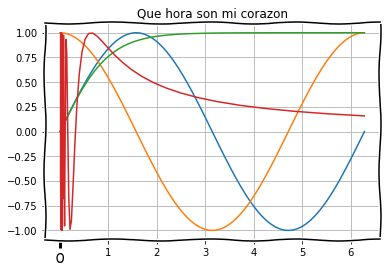

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

Z = np.zeros(10)
B = np.ones_like(Z)
print(f"Z: {Z}\nB: {B}")

x = np.linspace(0, np.pi*2, 101)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tanh(x)

u = np.logspace(-2, np.log10(np.pi*2))
v = np.sin(1/u)

plt.xkcd()

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(u, v)

plt.grid()
plt.title("Que hora son mi corazon")
plt.show()
# Undersøk numpyfunksjonene zeros (np.zeros) og ones (np.ones), lag med disse numpy-arrays av lengde 10
# og skriv dem ut med print-kommandoen
# Sjekk at numpy har alle standard elementære funksjoner, som sin, cos, tan, tanh etc og prøv ut et par av dem
# Undersøk numpy-funksjonene linspace (np.linspace) og logspace (np.logspace) 
# Bruk linspace til å lage et numpy-array med 100 ekvidistante verdier mellom 0 og 2*pi
# Bruk dette og plt.plot (og plt.show) for å plotte grafen til sin(x) og cos(x) mellom 0 og 2*pi. Legg gjerne
# på gridlinjer ved å kalle plt.grid()

**Oppgave 2**

La oss forsøke å gjøre noe "fornuftig". Så langt har vi i timene lært om intervallhalveringsmetoden, så la oss lage en enkel implementasjon av denne. Vi søker nullpunkter i funksjonen
$$
f(x) = \frac12 + \frac25 x - \mathrm{e}^{-16x^2}
$$

**(a)** Start med å plotte å lage en Python-funksjon som definerer $f(x)$ og plott den i intervallet $[-2,2]$.

**Kontrollspørsmål 1** Hvor mange nullpunkter har $f(x)$ i dette intervallet sett ut fra grafen?


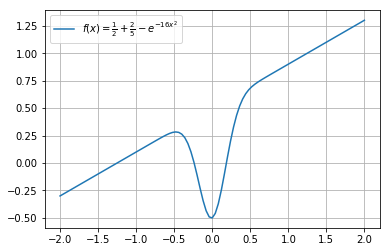

In [18]:
# Fyll inn koden for a-spørsmålet her
#import numpy as np
#import matplotlib.pyplot as plt

def f(x):
    return 1/2 + 2/5 * x - np.exp(-16 * x**2)

x = np.linspace(-2, 2, 101)
y = f(x)

#plt.xkcd()

plt.plot(x, y, label=r"$f(x) = \frac{1}{2} + \frac{2}{5} - e^{-16x^2}$")

plt.grid()
plt.legend()
plt.show()
    
# Fyll inn Pythonkode som definerer f(x) angitt ovenfor
#
# Skriv her kode som plotter funksjonen f(x) mellom -2 og 2 (np.linspace er hendig)

**(b)** Skriv en funksjon med navn *inthalv* som tar 4 inputargumenter, de er
* $f$: Funksjonen man skal finne nullpunkter av
* $a$: Venstre endepunkt i startintervallet
* $b$: Høyre endepunkt i startintervallet (må ha $f(a)\cdot f(b) < 0$)
* tol: En toleranse slik at $|r-m|<\mathrm{tol}$ der $r$ er roten og $m$ er midtpunktet av det siste beregnede intervallet

Funksjonen skal returnere midtpunktet $m$ i det sist beregnede intervallet, samt antall halveringer som er gjort.
Kjør så funksjonen med $f$ som ovenfor, $a=-1.5$, $b=1.5$, $\mathrm{tol}=10^{-7}$.

**Kontrollspørsmål 2** Er roten du får ut med disse inngangsverdiene større eller mindre enn $0.186134$ ?

**Kontrollspørsmål 3** Hvor mange intervallhalveringer bruker funksjonen for å finne svaret?

In [28]:
#def inthalv(f,a,b,tol): osv

def f(x):
    return 1/2 + 2/5 * x - np.exp(-16 * x**2)

def ithalv(f, a, b, tol):
    assert f(a)*f(b) < 0, "a*b is not other than zero"
    its = 0
    
    while abs(a-b) > tol:
        its += 1
        m = (a+b)/2
        
        if f(m) * f(a) < 0:
            b = m
        elif f(m) * f(b) < 0:
            a = m
        else:
            raise Exception("Oh noes")
        
    return m, its

#print(ithalv(lambda x: x+1, -2, 2000, 0.024))
print(f"Rot, iterasjoner: {ithalv(f, -1.5, 1.5, 1E-7)}")
            
    


# Skriv kode som definerer input og kaller inthalv her


Rot, iterasjoner: (0.18613430857658386, 25)


In [29]:
while True:
    pass

KeyboardInterrupt: 